In [12]:
!pip install -U -q PyDrive
!apt-get install cython
!pip install planarity
!pip install graphviz
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

In [13]:
import time
import sys
import networkx as nx
import itertools as it
import planarity 
import random
from networkx.algorithms import bipartite
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv


In [14]:
def floydWarshall(dist,vertices): 
	for k in range(vertices-1): 
		for i in range(vertices-1): 
			for j in range(vertices-1): 
				dist[i][j] = min(dist[i][j],dist[i][k]+dist[k][j])

In [15]:
def DPC(graph,vertices):

    for k in range(vertices-2, -1, -1):
        for j in range(0,k):
            for i in range(0,j):
                if graph[i][k] != float('inf') and graph[k][j] != float('inf'):
                    graph[i][j] = min(graph[i][j], graph[i][k]+graph[k][j])    
                if graph[j][k] != float('inf') and graph[k][i] != float('inf'):
                    graph[j][i] = min(graph[j][i], graph[j][k]+graph[k][i])
                if graph[i][j]+graph[j][i] < 0:
                    return False
    return True ,graph

In [16]:
def snowball(dist,vertices):
    graph = dist
    for k in range(vertices-1):
        for j in range(k-1, 0, -1):
            for i in range(0, k):
                dist[i][k] = min(dist[i][k], dist[i][j]+graph[j][k])
                dist[k][i] = min(dist[k][i], dist[j][i]+graph[k][j])


In [17]:
def createMatrix(vertices):

	#************* Reading from file ****************************************

	filename = 'planar_'+str(vertices)+'_nodes.txt'

	x,y,z= np.loadtxt(filename, delimiter = "\t", unpack = True)

	#************************************************************************

	#************ Generating Incident Matrix ********************************

	G = nx.Graph()
	G.add_nodes_from([1,vertices])


	for x1,y1,z1 in zip(x,y,z):
		x1 = int(x1)
		y1 = int(y1)
		z1 = int(z1)        
		G.add_edge(x1,y1,weight = z1)

	#**************************************************************************

	#************ Generating 2D adjacency matric ******************************

	A = nx.adjacency_matrix(G)
	b = A.todense()

	gr = []
	gr = nx.to_numpy_matrix(G)
	llist = []
	graph = []
	counter = 0
	c = 0
	for x in np.nditer(gr):
		c += 1
		if counter == vertices:
			counter = 0
			graph.append(llist)
			llist = []

		if x == 0:
			llist.append(float('inf'))
			counter += 1
		else:
			llist.append(int(x))
			counter += 1	
	return graph		

	#**************************************************************************


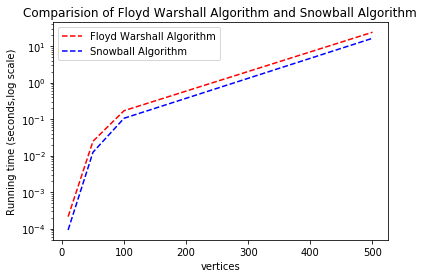

In [22]:
vertex = [10,50,100,500,1000] #dataset for vertices 5000, 20000, 50000 are also available but will take a lot of time

FTIME = [] #for storing run time for Floyd Warshall Algorithm for different datasets
STIME = [] #for storing run time for Snowball Algorithm for different datasets

for value in vertex:

	graph = createMatrix(value) # to create adjacency matrix 

	start = time.time()
	floydWarshall(graph,value) # invoking Floyd Warshall function
	end = time.time()
	FTIME.append(end - start)


	flag, graph = DPC(graph,value)		# preprocessing graph to make it DPC consistent 

	if flag == True:
		start = time.time()
		snowball(graph,value) # invoking Snowball function
		end = time.time()
		STIME.append(end - start)


comparisionPlot(STIME,FTIME) # plotting run time comparision of Floyd Warshall and Snowball



In [ ]:
def comparisionPlot(STIME,FTIME): # to plot comparision plot
    
    plt.plot(vertex, FTIME, 'r--', label = 'Floyd Warshall Algorithm')
    plt.plot(vertex, STIME, 'b--', label = 'Snowball Algorithm')	
    plt.xlabel('vertices')
    plt.ylabel('Running time (seconds,log scale)')
    plt.title('Comparision of Floyd Warshall Algorithm and Snowball Algorithm')
    plt.legend()
    plt.show()

In [63]:
def plotGraph(graph,vertices): # to plot graph stored in adjacency matrix form
    G = nx.Graph()
    print vertices
    for x in range(0, vertices-1, 1):
        for y in range(0, vertices-1, 1):
            if graph[x][y] != float('inf'):
                x = int(x)
                y = int(y)
                G.add_edge(x,y,weight = graph[x][y])
    
    nx.draw(G, with_labels=True) 